<br>
<br>
<br>
<br>

# DAV 6150 Module 4: Dimensionality Reduction & Feature Selection
<br>
<br>
<br>

# Module 4


## Machine Learning Models: "Simpler" is Better

- Machine learning models that are overly complex can be difficult, if not impossible, to interpret / explain


- Complex models can also be very computationally expensive


- A great deal of model complexity can be eliminated by simply reducing the number of explanatory variables employed within a model.


- Models can be simplified through the use of __Dimensionality Reduction__ and __Feature Selection__ techniques.


## Dimensionality Reduction

__What is "Dimensionality"?__: Within the context of data science and machine learning, "dimensionality" refers to the number of potential explanatory variables (a.k.a., "features") contained within a set of data we plan to make use of for the construction of a model.


__What is "The Curse of Dimensionality"?__: If the number of features available to us within a data set is very large relative to the number of observations, some machine learning algorithms will fail to produce effective models, particularly those which are based on similarity metrics (e.g., K-nearest neighbors, clustering, etc.).


__Dimensionality Reduction__: We can reduce the number of __numeric__ features to be used within a model via the application of linear algebra techniques (e.g., Principal Components Analysis (PCA); Singular Value Decomposition (SVD)). These methods allow us to derive orthogonal features from a non-orthogonal collection of __numeric__ features. We can then use these new orthogonal features as explanatory variables within our machine learning models.


### Principal Components Analysis (PCA)

- Watch Videos: [PCA](https://www.youtube.com/watch?v=HMOI_lkzW08) and [Comparison between Principal Component Analysis and Singular Value Decomposition](https://www.youtube.com/watch?v=FgakZw6K1QQ)

- PCA uses an orthogonal transformation to convert a set of possibly correlated __numeric__ features into a set of values of linearly uncorrelated (a.k.a., __orthogonal__) features known as __principal components__. These new features are then used in a machine learning model __in place of the original features that were used to generate the principal components__.  The principal components themselves are assessed by ranking them in order of the amount of variance in the data they explain. When used within a machine learning context, we generally opt to select the most relevant principal components (i.e., those that explain the greatest amount of variance). For example, we might decide we want to retain the principal components that cumulatively explain at least x% of the variability in the data. (__NOTE__: it is __NOT__ appropriate to use PCA on categorical features, even when they have been converted to binary "one-hot" dummy variables. If you want to reduce the dimensionality of categorical data you should instead rely on the use of __feature selection__ techniques).


- Unfortunately, there is no strict rule of thumb to apply when deciding how many principal components to retain for use within a machine learning model.


- __A major benefit of PCA__: PCA can often drastically the dimensionality of our data, thereby greatly reducing the number of explanatory variables needed to be included within a machine learning model.


- __A major drawback to PCA__: Principal components are extremely difficult to interpret / explain.  As such, any model constructed with principal components will also be __very__ difficult to interpret / explain.


- __Another major drawback to PCA__: PCA should not be applied to categorical features, even if they have been converted to binary "one-hot" dummy variables.


- A good, simple example from your assigned readings: https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


- Within Python we can make use of the __sklearn.decomposition.PCA()__ function to identify the principal components of a data set: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html



Code from : https://github.com/mattharrison/ml_pocket_reference/blob/master/ch17.ipynb

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import (ensemble,impute,model_selection,preprocessing,tree,)
from sklearn.experimental import (enable_iterative_imputer,)

In [12]:
df = pd.read_excel('https://raw.githubusercontent.com/SamarDeen/Yeshiva/main/titanic3.xls')

In [13]:
print(df.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [17]:
def tweak_titanic(df):
  df = df.drop(columns=["name","ticket","home.dest","boat","body","cabin",]).pipe(pd.get_dummies, drop_first=True)
  return df

def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
  y = df[y_col]
  X = df.drop(columns=y_col)
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=42)
  cols = X.columns
  num_cols = ["pclass","age","sibsp","parch","fare",]
  fi = impute.IterativeImputer()

  fitted = fi.fit_transform(X_train[num_cols])
  X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
  test_fit = fi.transform(X_test[num_cols])
  X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
  if std_cols:
    std = preprocessing.StandardScaler()
    fitted = std.fit_transform(X_train[std_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
    test_fit = std.transform(X_test[std_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

  return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler,
)
pca = PCA(random_state=42)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

[Text(0.5, 0, 'Component'),
 Text(0, 0.5, 'Percent of Explained variance'),
 Text(0.5, 1.0, 'Cumulative Variance'),
 (0.0, 1.0)]

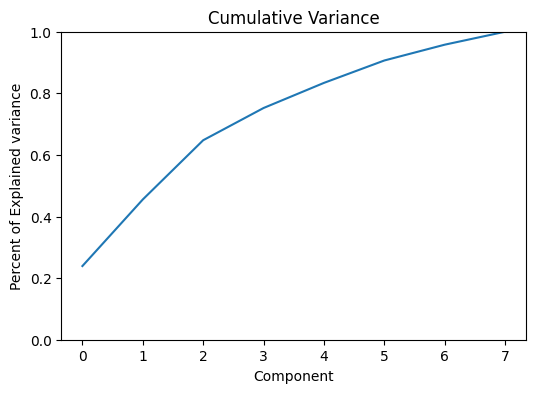

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    np.cumsum(pca.explained_variance_ratio_)
)
ax.set(
    xlabel="Component",
    ylabel="Percent of Explained variance",
    title="Cumulative Variance",
    ylim=(0, 1),
)

Plot the cumulative sum of explained variance ratio (scree plot). it shows how much information is stored in the components. The elbow method shows how many components to use.

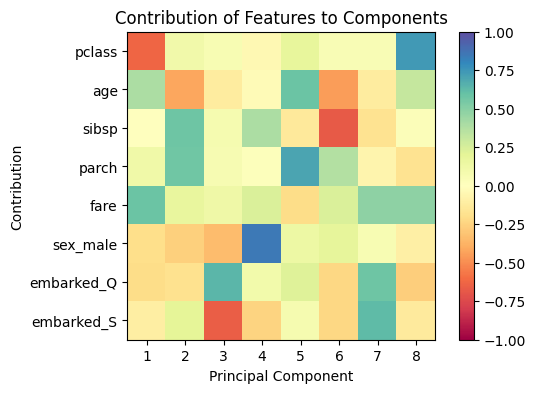

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.imshow(
    pca.components_.T,
    cmap="Spectral",
    vmin=-1,
    vmax=1,
)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(8), range(1, 9))
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title(
    "Contribution of Features to Components"
)
plt.colorbar()

The first component is heavily influenced by the pclass, age and fare columns.

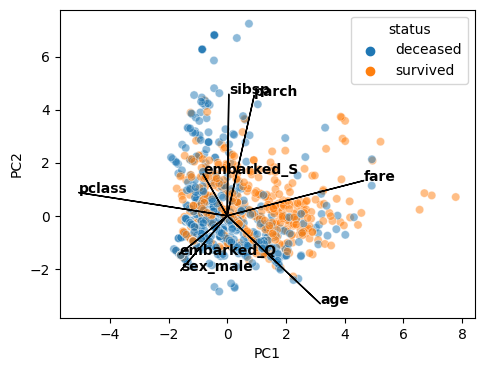

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
pca_df = pd.DataFrame(
    X_pca,
    columns=[
        f"PC{i+1}"
        for i in range(X_pca.shape[1])
    ],
)
pca_df["status"] = [
    ("deceased", "survived")[i] for i in y
]
evr = pca.explained_variance_ratio_
x_idx = 0  # x_pc
y_idx = 1  # y_pc
ax.set_aspect(evr[y_idx] / evr[x_idx])
x_col = pca_df.columns[x_idx]
y_col = pca_df.columns[y_idx]
sns.scatterplot(
    x=x_col,
    y=y_col,
    hue="status",
    data=pca_df,
    alpha=0.5,
    ax=ax,
)
scale = 8
comps = pd.DataFrame(
    pca.components_, columns=X.columns
)
for idx, s in comps.T.iterrows():
    plt.arrow(
        0,
        0,
        s[x_idx] * scale,
        s[y_idx] * scale,
        color="k",
    )
    plt.text(
        s[x_idx] * scale,
        s[y_idx] * scale,
        idx,
        weight="bold",
    )

The PCA is used to visualize high dimensional datasets, and help visualize clusters. In this case clusters are not obvious. The scatter plot also has a loading plot. The loadings indicate the strength of the features and their correlations.If their angles are close, they are correlated. If the angles are 90 degrees they are not correlated. If the angle is 180 degrees, they have a negative correlation.

From models we have determined that age, fare, sex are important for determining if a passanger survived.


Now let's look at a simple example of how to use the output of PCA as input to a machine learning algorithm (adapted from https://stackoverflow.com/questions/32194967/how-to-do-pca-and-svm-for-classification-in-python):

In [ ]:
# load numpy + 'datasets'. We'll use the "iris" data that is provided with sklearn
import numpy as np
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# load PCA + SVM classifier ("SVC") + cross validation functions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

# load the iris dataset
iris = datasets.load_iris()

# what is the dimensionality of the data?
iris.data.shape

(150, 4)

As we can see above, we have 150 observations comprised of 4 features. What do the features look like?

In [ ]:
# display the first row of the array
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

As shown above, each of the features contains floating point numbers. Since all of the features are numeric we can apply PCA to the data set in an attempt to reduce its dimensionality.

In [ ]:
# assign the explanatory variables to a Python object
X = iris.data

# assign the response variable to a Python object
y = iris.target

# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.9348581  0.04635375]


The application of PCA to the data set has yielded two principal components, the first of which explains 93.485% of the variance in the iris data. The second principal component explains an additional 4.635% of the variance in the data. Therefore, the two principal components explain a total of more than 98% of the variance in the data set.

In [ ]:
# display the singular values associated with the 2 principal components
print(pca.singular_values_)

[20.62747613  4.59320324]


In [ ]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)

# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)

# create an instance of an SVM classifier
clf = SVC()

# fit the SVM classifier to the transformed training data + the response data
clf.fit(X_t_train, y_train)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print ('score', clf.score(X_t_test, y_test) )

score 0.9333333333333333


Our SVM classifier has achieved an accuracy score of 93.3% when applied to the two principal components we derived from the iris data.

In [ ]:
# if desired, generate predictions from the SVM classifier for the transformed testing data
print ('pred label', clf.predict(X_t_test) )

pred label [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2]


# **Exercise**
Read the [Elite Data Science Primer ](https://elitedatascience.com/dimensionality-reduction-algorithms).
As you learn about the strengths and weakness of different dimensionality reduction algorithms (we'll do a deeper dive on PCA momentarily), seek the answers to the following:

1. What is “high dimensionality” within the context of data science?
2. What are the primary methods for selecting and extracting features?
3. What is Principal Component Analysis (PCA)?
4. What are their strengths and weaknesses (particularly PCA)?

Other dimension reduction methods:
1. Uniform Manifold Approximation Projection (UMAP)
2. t Distributed Stochastic Neighboring Embedding (t-SNE)

# **Code Along**

Read MLPR, Ch. 17, Dimensionality Reduction (pp 239-258) and [Code Along
MLPR, Ch. 17 Python code](https://github.com/mattharrison/ml_pocket_reference/blob/master/ch17.ipynb) (using the Titanic data set)

Citation: Harrison, M. (2019). Dimensionality reduction. In Machine Learning Pocket Reference: Working with Structured Data in Python. Sebastopol: O'Reilly Media.

Read HOML, Ch. 8, Dimensionality Reduction (20 pages) and [Code Along
HOML, Ch. 8 Python](https://github.com/mattharrison/ml_pocket_reference/blob/master/ch17.ipynb) (using the MNIST database of handwritten digits).

Citation: Géron, A. (2019). Dimensionality reduction. In Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). Sebastopol: O'Reilly Media.

## Feature Selection

See: https://github.com/mattharrison/ml_pocket_reference/blob/master/ch08.ipynb

We can determine which attributes/features to include within a model via the application of a variety of thresholding "filters" (e.g., exclude all variables whose variance falls below a certain value; if two or more variables are highly correlated with one another, choose one to use within the model and exclude the others; etc.)

Some of the most commonly used feature selection techniques include:

__Variance Threshholds__: Start by normalizing the features you plan to use as explanatory variables, then calculate their variances. Features whose values show relatively little variance are much less likely to be introducing valuable information within the context of a model, so they are strong candidates for exclusion from your model. How you choose the threshold value is highly subjective / empirical.


__Correlation Thresholds__: Remove features that are highly correlated with other features. As with variance thresholds, the choice of a correlation value to use as a threshold is highly subjectve / empirical.


__Forward Selection__: Used in regression modeling. Incrementally add features to a model one at a time until model performance no longer improves. A common approach to Forward Stepwise Search is to begin your modeling using the explanatory variable that is most highly correlated with the response variable, then sequentially add additional explanatory variables in decreasing order of their correlation with the response variable. The general algorithm is as follows:

- Start with the null model, a model containing an intercept but no predictors.
- Fit a simple linear regression model to each individual explanatory variable and then add to the null model that variable resulting in the lowest residual sum of squares value ("RSS").
- Add to that model the variable that results in the lowest RSS amongst all two-variable models.
- The algorithm continues until some stopping rule is satisfied (i.e. all remaining variables have a p-value greater than some
threshold).

An example of one way to implement forward selection in Python can be found here: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f


__Backward Selection__: Used in regression modeling. Start your modeling process using all of the explanatory variables you believe to be appropriate, then sequentially remove variables one at a time until model performance starts to substantively degrade. The general algorithm is as follows:

- Begin with all variables in the model.
- Remove the variable with the largest p-value (i.e. least statistically significant).
- The new model is fit, and the variable with the largest p-value is removed.
- The algorithm continues until a stopping rule is reached (e.g., the p-values of all variables are <= 0.05)

An example of one way to implement backward selection in Python can be found here: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f


__Variance Inflation Factors (VIF)__: A regression-specific metric that can use to help us select features for inclusion within a regression algorithm. A VIF value provides an indication of the presence of multicolinearity amongst the explanatory variables used for regression modeling. VIF is calculated by regressing an explanatory variable against every other available explanatory variable. In general, if your VIF calculations for a feature result in a VIF > 5, that feature is a strong candidate for removal from the model: rerun the model without the variable and check to see whether the model's performance has improved. If so, exclude the feature from the model. If not, leave the feature in the model. An excellent overview of VIF is provided in your assigned reading materials: https://www.statisticshowto.com/variance-inflation-factor/



# **Exercise**

Read the [Analysis Factor Blogpost](https://www.theanalysisfactor.com/eight-ways-to-detect-multicollinearity/)

As you read this article about the different ways to detect multicollinearity in a model, seek the answers to the following:

What is the concept of collinearity?
How can collinearity be identified within a data set?
If two or more variables are found to be collinear, how do we choose which one(s) to exclude from our model?
Citation: Grace-Martin, K. (n.d.) Eight Ways to Detect Multicollinearity. Retrieved from https://www.theanalysisfactor.com/eight-ways-to-detect-multicollinearity/



# [Module 4 Assignment Guidelines](https://yu.instructure.com/courses/63488/assignments/324299?module_item_id=1157261) / Requirements


#[ Final Project Guidelines ](https://yu.instructure.com/courses/63488/pages/final-project-overview?module_item_id=1157247)/ Requirements

